# Stochastic Simulation Assignment 2

# Todo list:

#### 2)
use some z/t/etc test

#### 3)
priority queue impl does not yet exist

#### 4)
longtail dist should have same mean as other dists

In [1]:
# Imports

import simpy
import queue
import numpy.random as rand
import numpy as np
import matplotlib.pyplot as plt

from stochasticQueueing import *

## 2)

In [ ]:
def M_M_n_simulation(system_load, server_count, sim_duration, seed=42, queue_type='FIFO'):
    """
    Simulates an M/M/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is 42).
    - queue_type: Type of queue (default is 'FIFO').

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    # Set arrival and service rates
    arrival_rate = server_count
    service_rate = 1 / system_load

    arrival_dist = lambda: rand.exponential(1 / arrival_rate)
    service_dist = lambda: rand.exponential(1 / service_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(
        arrival_dist, service_dist, server_count, queue_type=queue_type, sim_duration=sim_duration, seed=seed
    )
    return sim.results()

1 9.445273799906728
2 5.818863542882133
4 11.506997412114469
8 8.66084096322714
16 1.994895546163684


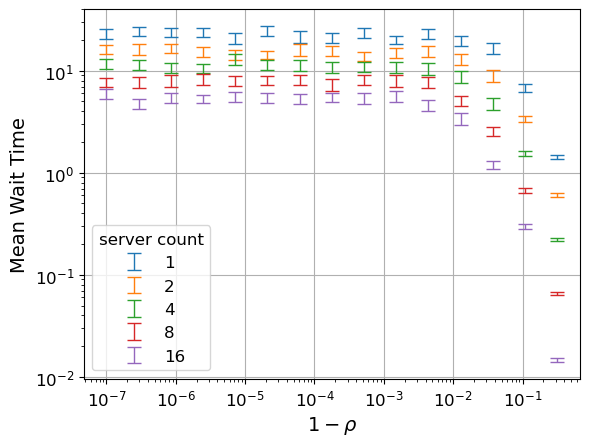

In [3]:
server_counts = [1, 2, 4, 8, 16]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)
mean_wait_time = np.zeros_like(system_loads)
std_wait_time = np.zeros_like(system_loads)
for server_count in server_counts:
    for i, system_load in enumerate(system_loads):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, 1000, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    # plt.plot(1 - system_loads, mean_wait_time, label=f'{server_count}')
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(1 - system_loads, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='server count', title_fontsize=12, fontsize=12)


In [ ]:
server_counts = [1, 2, 4]
num_runs = 1
rand.seed(42)
system_load = 0.99
max_duration = np.logspace(1, 7, 15)
mean_wait_time = np.zeros_like(max_duration)
std_wait_time = np.zeros_like(max_duration)
for server_count in server_counts:
    for i, duration in enumerate(max_duration):
        wait_times = np.zeros(num_runs)
        for j in range(num_runs):
            
            res = M_M_n_simulation(system_load, server_count, duration, seed=rand.randint(0,2**31-1))
            wait_times[j] = res['Average Wait Time']

        mean_wait_time[i] = np.mean(wait_times)
        std_wait_time[i] = np.std(wait_times)
    # plt.plot(1 - system_loads, mean_wait_time, label=f'{server_count}')
    print(server_count, np.mean(wait_times[-1]))
    plt.errorbar(max_duration, mean_wait_time, 1.96*std_wait_time/np.sqrt(num_runs), linestyle='', label=f'{server_count}', capsize=5, elinewidth=1)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.xlabel(r'simulation duration', fontsize=14)
plt.ylabel('mean wait time', fontsize=14)
plt.legend(title='server count', title_fontsize=12, fontsize=12)

## 3)


In [ ]:
server_counts = [1]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

for queue_type in ['FIFO', 'SJF']:
    for server_count in server_counts:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        for i, system_load in enumerate(system_loads):
            wait_times = np.zeros(num_runs)
            for j in range(num_runs):
                res = M_M_n_simulation(
                    system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1), queue_type=queue_type
                )
                wait_times[j] = res['Average Wait Time']

            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)
        plt.errorbar(
            1 - system_loads,
            mean_wait_time,
            std_wait_time,
            linestyle='',
            label=f'{queue_type}',
            capsize=5,
            elinewidth=1,
        )

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Queue Type', title_fontsize=12, fontsize=12)
plt.show()


In [ ]:
server_counts = [1]
num_runs = 100
rand.seed(42)
system_loads = 1 - np.logspace(-0.5, -7, 15)

for queue_type in ['FIFO', 'SJF']:
    for server_count in server_counts:
        mean_wait_time = np.zeros_like(system_loads)
        std_wait_time = np.zeros_like(system_loads)
        for i, system_load in enumerate(system_loads):
            wait_times = np.zeros(num_runs)
            for j in range(num_runs):
                res = M_M_n_simulation(
                    system_load, server_count, 1000, seed=rand.randint(0, 2**31 - 1), queue_type=queue_type
                )
                wait_times[j] = res['Average Wait Time']

            mean_wait_time[i] = np.mean(wait_times)
            std_wait_time[i] = np.std(wait_times)

        # Plot with shadow (fill_between)
        x_values = 1 - system_loads
        plt.plot(x_values, mean_wait_time, label=f'{queue_type}')
        plt.fill_between(
            x_values,
            mean_wait_time - std_wait_time,
            mean_wait_time + std_wait_time,
            alpha=0.2, label=f'STD of {queue_type}'
        )

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$1-\rho$', fontsize=14) 
plt.ylabel('Mean Wait Time', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.legend(title='Queue Type', title_fontsize=12, fontsize=12)

plt.savefig('plots/queue_types_shadow_plot')
plt.show()


## 4)
different service rates

In [6]:

def M_X_n_simulation(system_load, server_count, sim_duration, seed=42, service_dist=None):
    """
    Simulates an M/X/n queueing system.

    Parameters:
    - system_load: The load factor of the system (λ/μ).
    - server_count: The number of servers in the system.
    - sim_duration: The duration of the simulation.
    - seed: Seed for the random number generator to ensure reproducibility (default is 42).
    - service_dist: Custom service distribution (default is exponential).

    Returns:
    - sim.results(): Results of the queueing simulation.
    """

    # Set arrival rate and job completion rate
    arrival_rate = server_count
    job_completion_rate = 1 / system_load
    
    arrival_dist = lambda: rand.exponential(1 / arrival_rate)

    # Use default exponential service distribution if none is provided
    if service_dist is None:
        service_dist = lambda: rand.exponential(1 / job_completion_rate)

    # Initialize and run the simulation
    sim = ServerQueueingSimulation(arrival_dist, service_dist, server_count, sim_duration=sim_duration, seed=seed)
    
    return sim.results()


for service_type in ['exponential', 'deterministic (M/D/n)', 'hyperexponential']:

    service_rate = 1/0.9

    if service_type == 'exponential':
        service_dist =  lambda : rand.exponential(1 / service_rate)

    elif service_type == 'deterministic (M/D/n)':
        service_dist = lambda : 1/service_rate
        
    elif service_type == 'hyperexponential':
        def service_dist():
            if rand.rand() < 0.75:
                return rand.exponential(1.0)
            else:
                return rand.exponential(5.0)

    else:
        raise ValueError("Unsupported service time distribution")
    

    print(service_type, M_X_n_simulation(0.9, 1, 100000, service_dist=service_dist))
    

exponential {'Average Wait Time': 8.407823678698447, 'Rejection Rate': 0.0, 'Completed Jobs': 100008, 'Total Jobs': 100009, 'Rejected Jobs': 0}
deterministic (M/D/n) {'Average Wait Time': 4.053847207580608, 'Rejection Rate': 0.0, 'Completed Jobs': 100391, 'Total Jobs': 100399, 'Rejected Jobs': 0}
hyperexponential {'Average Wait Time': 1967.6584223178397, 'Rejection Rate': 0.9747710487444609, 'Completed Jobs': 49774, 'Total Jobs': 50775, 'Rejected Jobs': 49494}
